In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def DFT(img):
    planes = [np.float32(img), np.zeros(img.shape, np.float32)]
    complexI = cv2.merge(planes)
    
    cv2.dft(complexI, complexI, cv2.DFT_COMPLEX_OUTPUT)
    cv2.split(complexI, planes)
    
    phase = np.arctan(planes[1] / planes[0])
    mag = cv2.magnitude(planes[0], planes[1])
    
    
    cv2.normalize(mag, mag, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
    print(type(mag))
    return mag, phase

In [49]:
def DCT(img):
    dct = cv2.dct(np.float32(img))
    dct = cv2.magnitude(dct, dct)
    
    
    cv2.normalize(dct, dct, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
    return dct

In [50]:
def blockDCT(img):
    rows = img.shape[0]
    cols = img.shape[1]
    
    dct = np.zeros(img.shape, np.float32)
    
    for i in range(0, rows, 8):
        for j in range(0, cols, 8):
            tmp = cv2.dct(np.float32(img[j:j+8, i:i+8]))
            dct[j:j+8, i:i+8] = cv2.magnitude(tmp, tmp)
            

    cv2.normalize(dct, dct, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
    return dct

In [51]:
def main():
    lenna_gray = cv2.imread('./pic/lenna_gray.bmp', cv2.IMREAD_GRAYSCALE)
    mag, phase = DFT(lenna_gray)
    dct = DCT(lenna_gray)
    block_dct = blockDCT(lenna_gray)
    
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(mag, cmap='gray')
    plt.title('Magnitude')
    plt.subplot(2, 2, 2)
    plt.imshow(phase, cmap='gray')
    plt.title('Phase')
    plt.subplot(2, 2, 3)
    plt.imshow(dct, cmap='gray')
    plt.title('DCT')
    plt.subplot(2, 2, 4)
    plt.imshow(block_dct, cmap='gray')
    plt.title('Block DCT')
    plt.tight_layout()
    plt.show()
    print(mag)
    print(dct)
    print(lenna_gray)

<class 'numpy.ndarray'>


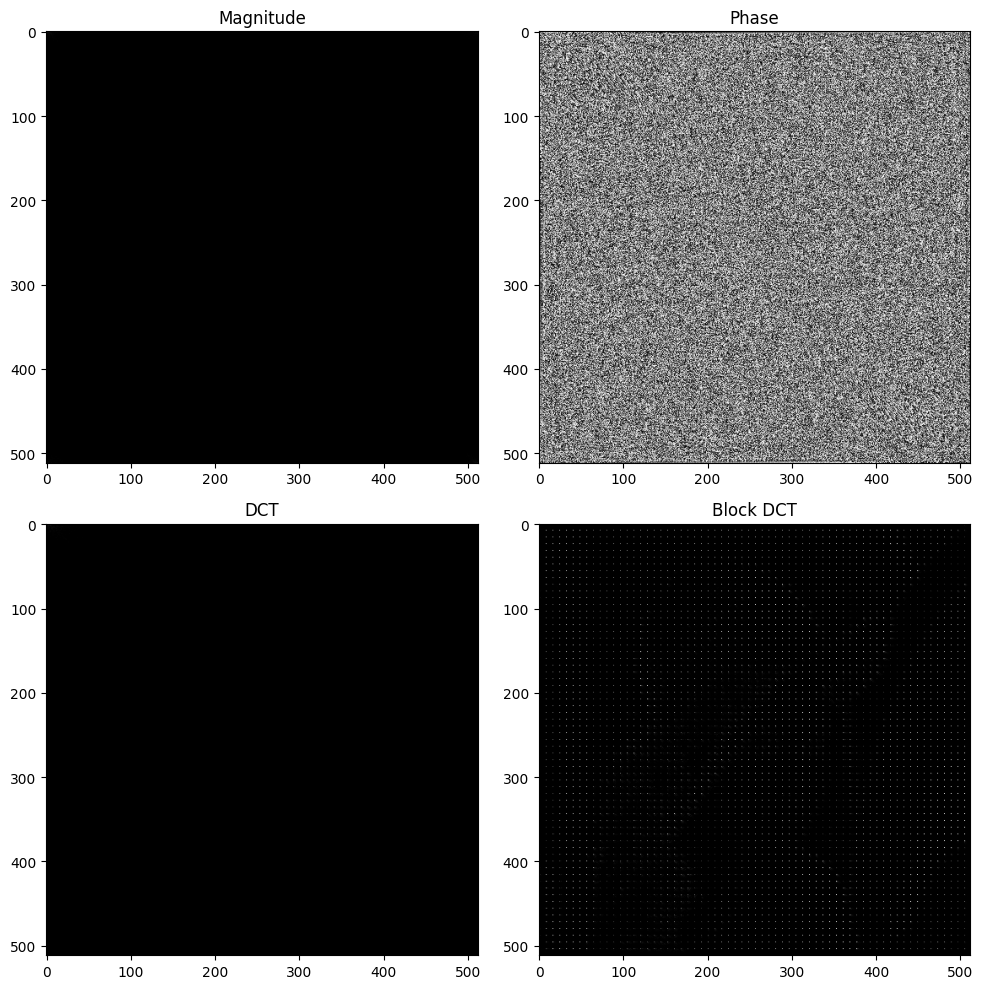

[[1.         0.07743924 0.06116689 ... 0.02183402 0.06116689 0.07743923]
 [0.0392681  0.07184847 0.03496108 ... 0.03358268 0.0182241  0.03060051]
 [0.01576101 0.01008245 0.02549416 ... 0.03179675 0.02365655 0.02635402]
 ...
 [0.01808689 0.0324896  0.01787629 ... 0.03183055 0.02214099 0.01931006]
 [0.01576101 0.02635402 0.02365655 ... 0.02897335 0.02549416 0.01008245]
 [0.0392681  0.03060051 0.0182241  ... 0.0633503  0.03496108 0.07184847]]
[[1.0000000e+00 8.4758222e-02 2.1334389e-02 ... 8.8329922e-05
  8.8366724e-05 2.7491531e-04]
 [5.8466386e-02 6.3526861e-02 5.3368270e-02 ... 7.4698335e-05
  1.6320159e-04 2.6912513e-04]
 [3.0357966e-03 2.6013216e-02 4.9020756e-02 ... 1.7788285e-05
  7.9637037e-05 2.0461652e-05]
 ...
 [2.4946710e-05 8.2698731e-05 1.6477587e-05 ... 3.9777500e-05
  3.8366994e-05 3.8268328e-05]
 [8.6129745e-05 7.9992271e-05 6.9890528e-05 ... 2.4545747e-05
  7.0452799e-05 5.2308616e-05]
 [2.8522192e-05 6.5417356e-05 6.6131921e-05 ... 7.7022487e-06
  5.4395907e-05 3.458296

In [52]:
if __name__ == "__main__":
    main()